Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

* 1.Check for null values in the numerical columns.
* 2.Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
* 3.Use appropriate EDA technique where ever necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSet.csv',low_memory=False)

In [3]:
data.shape

(95412, 481)

In [4]:
numerical = data.select_dtypes(np.number) # getting numerical columns first
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [5]:
categorical = data.select_dtypes([object])
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


* 1.Check for null values in the numerical columns.

In [6]:
numerical.isna().sum() #checkin null values

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
AVGGIFT         0
CONTROLN        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 405, dtype: int64

In [7]:
nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index() #getting % of null values
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
400,AVGGIFT,0.000000
401,CONTROLN,0.000000
402,HPHONE_D,0.000000
403,RFA_2F,0.000000


In [8]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0] # 91 columns have null values

,column_name,nulls_percentage
3,AGE,0.248030
4,NUMCHLD,0.870184
5,INCOME,0.223096
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
...,...,...
386,RAMNT_23,0.917631
387,RAMNT_24,0.814090
398,NEXTDATE,0.104526
399,TIMELAG,0.104526


* 2.Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [9]:
categorical['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [10]:
categorical['GEOCODE2'].isna().sum()

132

In [11]:
categorical['GEOCODE2'].notna().sum()

95280

In [12]:
ml = list(categorical[categorical['GEOCODE2'].notna()].index) #not being missins values

In [13]:
categorical = categorical.loc[ml,:] #dropping both from categorical and numericals
numerical = numerical.loc[ml,:]

In [14]:
categorical['GEOCODE2'].value_counts(dropna=False)


A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

-- WEALTH1

In [15]:
numerical['WEALTH1'].value_counts(dropna=False)


NaN    44632
9.0     7580
8.0     6785
7.0     6196
6.0     5823
5.0     5277
4.0     4808
3.0     4233
2.0     4083
1.0     3452
0.0     2411
Name: WEALTH1, dtype: int64

In [16]:
numerical['WEALTH1'].isna().sum() #checking missing values

44632

In [17]:
ml = numerical[numerical['WEALTH1'].notna()].index.tolist()
numerical = numerical.loc[ml,:]
categorical = categorical.loc[ml,:]

In [18]:
numerical['WEALTH1'].value_counts(dropna=False)


9.0    7580
8.0    6785
7.0    6196
6.0    5823
5.0    5277
4.0    4808
3.0    4233
2.0    4083
1.0    3452
0.0    2411
Name: WEALTH1, dtype: int64

In [19]:
numerical['WEALTH1'].isna().sum() #no missing values

0

-- ADI

In [20]:
numerical['ADI'].value_counts(dropna=False)

13.0     3345
51.0     2628
65.0     1910
57.0     1537
197.0    1284
         ... 
601.0       1
139.0       1
145.0       1
161.0       1
140.0       1
Name: ADI, Length: 200, dtype: int64

In [21]:
numerical['ADI'].isna().sum() # no missing value

0

In [22]:
numerical['ADI'].unique()

array([ 13., 281.,  67., 127.,  91., 251., 391., 269.,  83., 107., 291.,
        57., 329.,  55.,  73., 159., 201.,  75., 203., 105., 111., 173.,
       351., 109., 197., 279., 645., 361., 113., 131., 199., 187., 129.,
       441., 209., 235.,  39., 335., 577., 439., 455., 383., 249., 263.,
         0., 427., 185.,  15., 245.,  51., 175.,  59., 119., 233., 273.,
       325., 371., 377.,  89., 181., 342., 421., 219.,  65., 283., 339.,
       417., 299., 271.,  87., 451., 315., 157.,  71., 363., 367., 275.,
       403.,  77., 448., 217., 221., 165., 393., 207., 277., 319., 353.,
       247., 241., 307.,  69., 323., 213., 381., 179., 389., 331., 337.,
       457., 301., 359.,  17.,  53., 321., 327., 257., 413., 469., 303.,
       205., 412.,  63., 405., 373., 133., 211., 229., 243., 227.,  61.,
       425., 253., 313., 423., 433.,  85., 215.,  93., 115., 409., 445.,
       459., 177., 415., 449., 379., 237., 355., 255., 437., 419.,  19.,
       195., 467., 305., 435., 621., 295., 473.,  1

In [23]:
len(numerical['ADI'].unique())

200

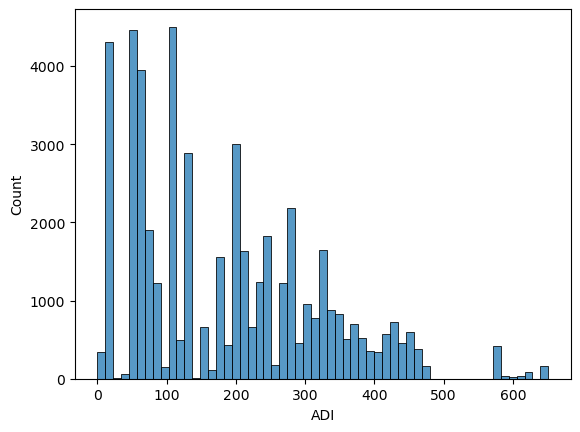

In [24]:
sns.histplot(numerical['ADI']);

In [25]:
numerical['ADI'].describe()

count    50648.000000
mean       186.691715
std        134.036482
min          0.000000
25%         67.000000
50%        175.000000
75%        279.000000
max        651.000000
Name: ADI, dtype: float64

In [26]:
df=numerical.loc[(numerical['ADI']<500)]

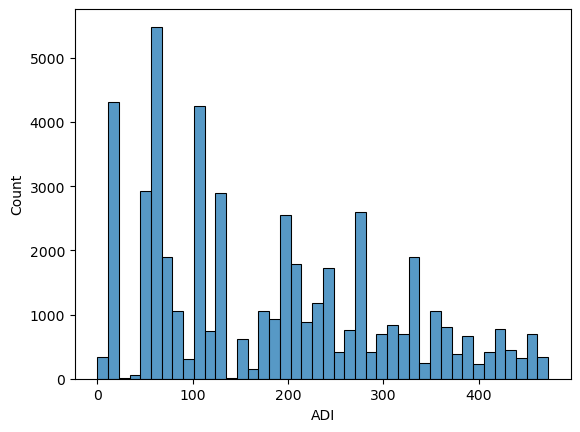

In [27]:
sns.histplot(df['ADI']);

-- DMA

In [28]:
numerical['DMA']

1        803.0
2        518.0
3        862.0
4        528.0
6        509.0
         ...  
95400    528.0
95401    716.0
95406    534.0
95408    618.0
95411    550.0
Name: DMA, Length: 50648, dtype: float64

In [29]:
numerical['DMA'].value_counts(dropna=False)

803.0    3345
602.0    2630
807.0    1910
505.0    1538
524.0    1285
         ... 
584.0       1
598.0       1
538.0       1
502.0       1
552.0       1
Name: DMA, Length: 201, dtype: int64

In [30]:
len(numerical['DMA'].value_counts(dropna=False))

201

In [31]:
numerical['DMA'].isna().sum() #no missing values

0

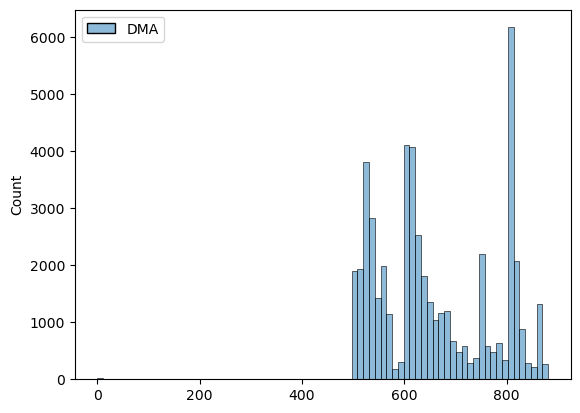

In [32]:
sns.histplot([numerical['DMA']]) 
plt.show()

-- MSA

In [33]:
numerical['MSA'].value_counts(dropna=False)

0.0       9734
1600.0    2307
4480.0    2185
2160.0    1381
520.0     1108
          ... 
1480.0       1
1320.0       1
2281.0       1
1303.0       1
7610.0       1
Name: MSA, Length: 287, dtype: int64

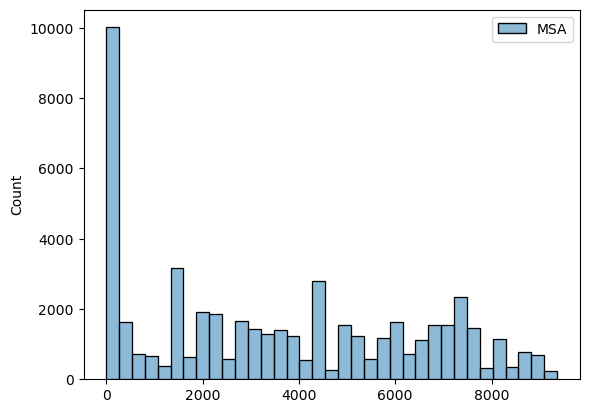

In [34]:
sns.histplot([numerical['MSA']]) 
plt.show()

In [35]:
# replacing the 0 with the median
numerical['MSA'] =numerical['MSA'].replace(0, np.mean(numerical['MSA']))

In [36]:
numerical['MSA'].value_counts(dropna=False)

3599.366451    9734
1600.000000    2307
4480.000000    2185
2160.000000    1381
520.000000     1108
               ... 
1480.000000       1
1320.000000       1
2281.000000       1
1303.000000       1
7610.000000       1
Name: MSA, Length: 287, dtype: int64

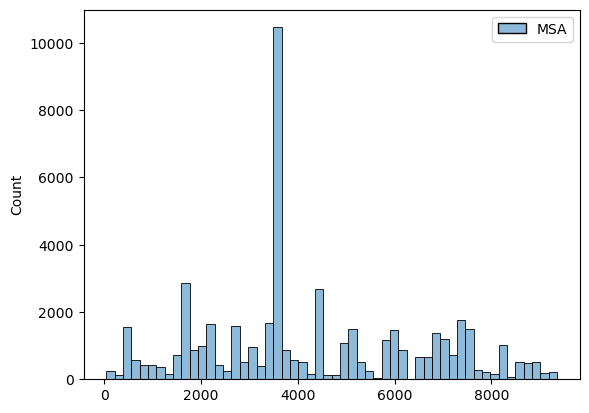

In [37]:
sns.histplot([numerical['MSA']]) 
plt.show()